# Introduction to SUPERVISED LEARNING

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
advertising = pd.read_csv('/home/giando/p3/1-work/Artificial-Intelligence-with-Python/data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [47]:
advertising[['TV','Sales']]

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


Proviamo a rappresentare i dati

Text(0.5, 1.0, 'Sales vs investment in TV advertising')

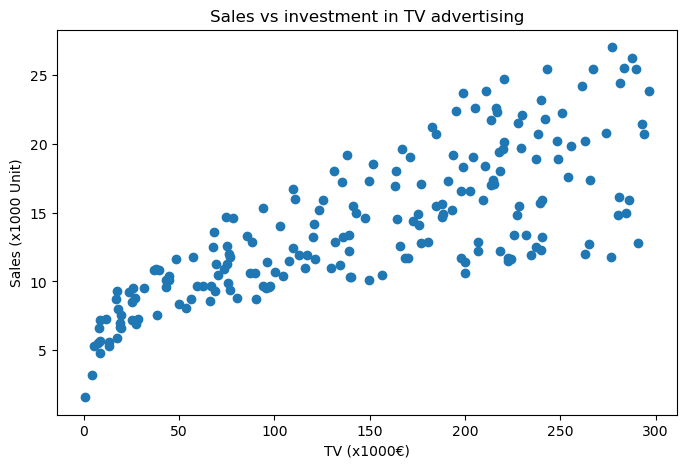

In [40]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')


Text(0.5, 1.0, 'Sales vs investment in Radio advertising')

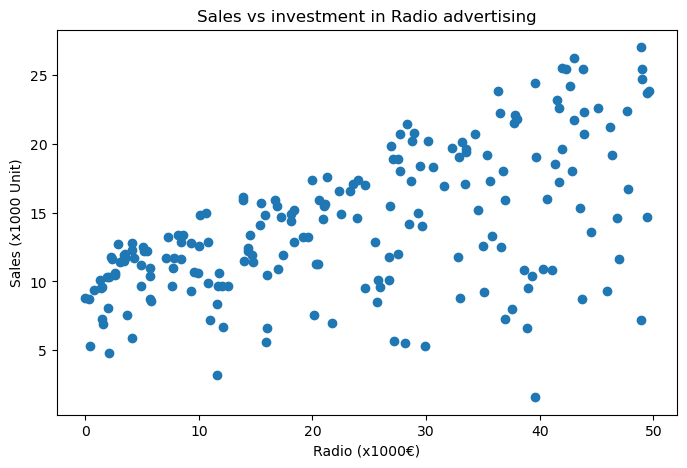

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['Radio'].values, advertising['Sales'].values)
plt.xlabel("Radio (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in Radio advertising')

Text(0.5, 1.0, 'Sales vs investment in Newspaper advertising')

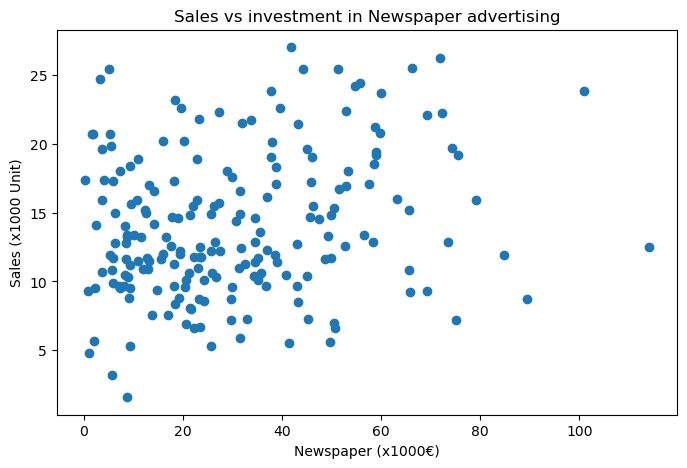

In [103]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['Newspaper'].values, advertising['Sales'].values)
plt.xlabel("Newspaper (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in Newspaper advertising')

Ricordiamo che Il nostro obiettivo è, dato un training set, per mezzo di un Learning Algorithm, individuare una funzione h: X → Y in modo che h (x) sia un “good” PREDICTOR.

Andiamo ad individuare il TRAINING SET

In [101]:
# creiamo il training set
# input features
x_train = advertising['TV'].values
x_train =x_train.reshape(-1,1)
# target
y_train = advertising['Sales'].values
y_train =y_train.reshape(-1,1)


Quante features abbiamo?

In [104]:
print(x_train.shape, y_train.shape)

(200, 1) (200, 1)


Ora dobbiamo effettuare il training sulla funzione

$h(x) = y = w_0 + w_1 x$

Il nostro modello è un modello di LINEAR REGRESSION con parametri $w_0, w_1$

Proviamo a plottare la nostra funzione sui dati che abbiamo a disposizione

In [135]:
x0

array([  0, 300])

In [134]:
h(x0,w0,w1)

array([ 7., 22.])

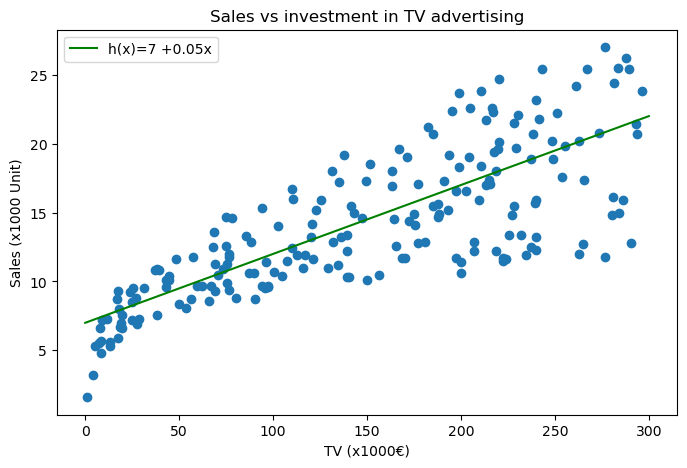

In [148]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')

def h(x, w0, w1):
    return w0+w1*x

# parametri
w0 = 7; w1 = 0.05
# punti x 
x0 = 0; x1 = 300

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

plt.plot(p1,p2, '-g', label='h(x)='+str(w0)+' +'+str(w1)+'x')
plt.legend()

Come facciamo a scegliere i parametri $w_0, w_1$ ?

Usiamo l'algoritmo di training

In [149]:
from sklearn.linear_model import LinearRegression


CREIAMO IL MODELLO
Utilizziamo la funzione LinearRegression ()


In [150]:
model = LinearRegression()

FACCIAMO IL TRAINING
Utilizziamo la funzione LinearRegression ()

In [153]:
model.fit(x_train, y_train)

LinearRegression()

Quali valori dei parametri w0 e w1 ha calcolato il nostro learning algorithm?

In [161]:
w0 = model.intercept_[0]
w1 = model.coef_[0][0]

print('Il valore di w0 è: ',w0)
print('Il valore di w1 è: ',w1)


Il valore di w0 è:  7.032593549127693
Il valore di w1 è:  0.047536640433019764


Proviamo ora a plottare la nostra retta

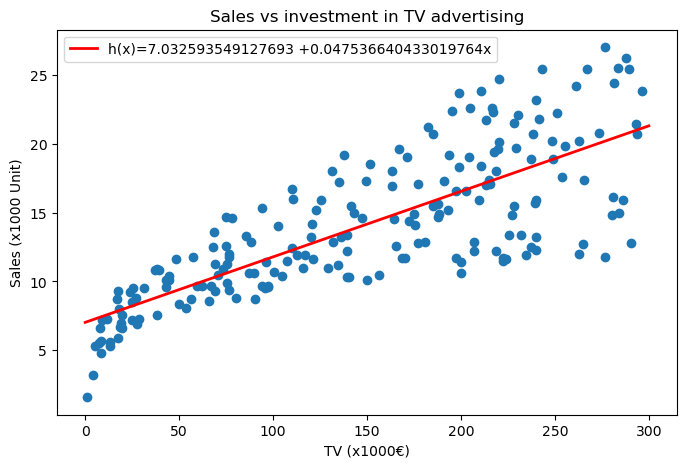

In [166]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')
# punti x 
x0 = 0; x1 = 300

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

plt.plot(p1,p2, '-r', lw=2, label='h(x)='+str(w0)+' +'+str(w1)+'x')
plt.legend()

Proviamo ora a fare qualche PREVISIONE

Quante vendite riesco a fare se investo 134000€ in TV advertising? E se investo 230000€ ?

In [172]:
xp = np.array([134, 230]).reshape(-1,1)
yp = model.predict(xp)
yp

array([[13.40250337],
       [17.96602085]])

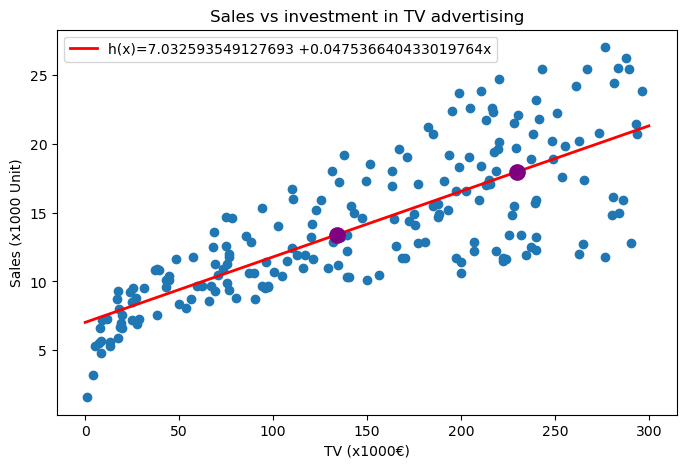

In [188]:
plt.figure(figsize=(8,5))
plt.scatter(advertising['TV'].values, advertising['Sales'].values)
plt.xlabel("TV (x1000€)")
plt.ylabel("Sales (x1000 Unit)")
plt.title('Sales vs investment in TV advertising')
# punti x 
x0 = 0; x1 = 300

p1 = np.array([x0,x1])  # punto (x0, x1)
p2 = np.array([h(x0,w0,w1),h(x1,w0,w1)]) # punto (h(x0), h(x1))

plt.plot(p1,p2, '-r', lw=2, label='h(x)='+str(w0)+' +'+str(w1)+'x')


plt.plot(xp,yp, 'o', color='purple', ms=11)

plt.legend()

# ORA PROVA TU. 
- Quante unità riesco a vendere con un investimento di 20000€ in radio? 
- Quante unità riesco a vendere con un investimento di 62000€ in newspaper? 

## 3.1 Simple Linear Regression - Theory recap

- Now we have a bunch of numbers for predictors and we have a bunch of number for response. 

- We want to find a functional relation between predictors and response. 

- In general we can think that $Y$ is a random variable and $X$ is a random variable also.

- If I'm looking for a functional relationship between $Y$ and $X$ , $Y=f(X)$ (take care $Y$,$X$ are r.v.). Considering the LOSS functional $L(Y-f(X))^2$ and $X$ FIXED on a specific $x$, minimizing $L$ respect to $f$ we find that the best choice is to take $f$ as the CONDITIONAL EXPECTATION of the variable $Y$ given a value of $X$, ie $E(Y|X=x)$. So we can look for a function to represent this conditional expect, $E(Y|X=x) = f(x)$ (which is called POPULATION REGRESSION FUNCTION). This is of course a function (in ordinary meaning) of x. 

- For linear regression I ASSUME $f$ is linear. $f(x) = \beta_1 + \beta_2x$. (this is a first assumpion)

- Even supposed that the TRUE model has a condional mean of Y that is linear in x, we tackle the fact that the parameters are unknown!

- We have to find estimates of the parameters to approximate f. So we find $\hat f(x) = \hat \beta_1 + \hat \beta_2 x$. This is the SAMPLE REGRESSION FUNCTION

- Of course there will be an error ($f - \hat f$)!! 

- Now remember that $f(x)$ is $E(Y|X)$. What about $Y$ itself? 

- Remember $Y$ is a Random Variable. We can set $Y|X = f(x) + ε$ where $f(x)$ is fixed and $ε$ is an error. 

- We can consider $ε$ as a random variable and make assumpion on its distribution. We start making assumption just on the first and second moment $E$ and $Var$.

- In this way $E(Y|X) = f(x) + E(ε)$

- We are studying CLASSICAL linear regression so $E(ε)=0$, $VAR(ε)=σ^2 = const$ and $COV(ε_i,ε_j) =0$ 


### Figure 3.1 - Least squares fit

/home/giando/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


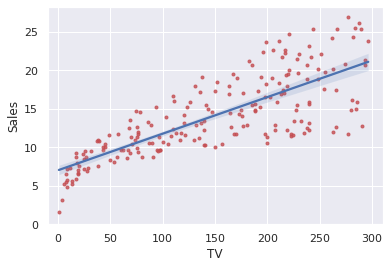

In [54]:
#Let's have a look of the regression with OLS
# we define RSS = Σ (ε_i)^2 and find min(β) RSS
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=95, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

FIG 3.1: For the Advertising data, the least squares fit for the regression
of sales onto TV is shown. The fit is found by minimizing the sum of squared
errors. The fit makes a compromise averaging the squares of the errors. In this case a linear fit captures the essence of the relationship, although it is somewhat deficient in the left of the plot.

### Regression coefficients - RSS

In [131]:
# Regression coefficients (Ordinary Least Squares) (use a different library)
regr = skl_lm.LinearRegression()

#Note that the text in the book describes the coefficients based on uncentered data,
# whereas the plot shows the model based on centered data. 
# The latter is visually more appealing for explaining the concept of a minimum RSS. 

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
# demean the data
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


In [132]:
# we check that the intercept is the unconditional mean of y
st.mean(y)

14.022499999999999

In [59]:
y.size

200

In [60]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

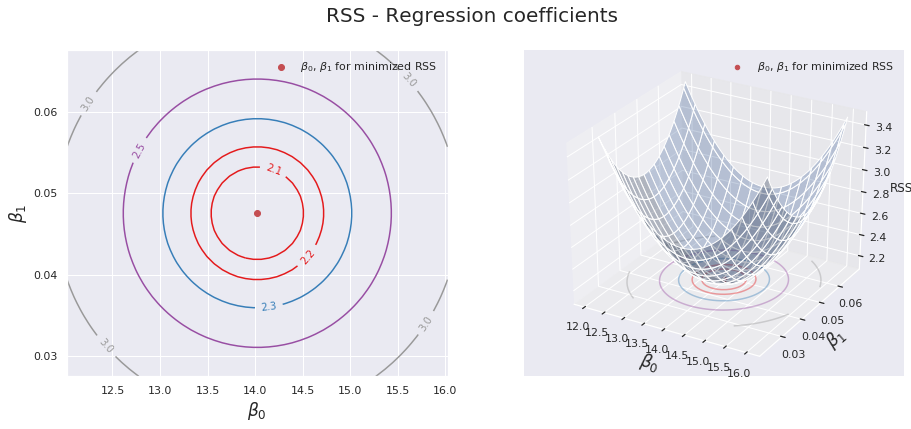

In [61]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

FIGURE 3.2. Contour and three-dimensional plots of the RSS on the
Advertising data, using sales as the response and TV as the predictor. The
red dots correspond to the least squares estimates $\hat \beta_0$ and $\hat \beta_1$ , given by (3.4).

In [62]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Let's try with a different model

In [134]:
df = pd.read_csv('Data/Boston.csv', index_col=0)
df.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,,,,,,,,,,,,,
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [135]:
# we regress lstat on medv
lm = sm.OLS.from_formula('medv ~ lstat', df)
result = lm.fit()

In [136]:
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,34.5538,0.563,61.415,0.000,33.448,35.659
lstat,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


In [137]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           5.08e-88
Time:                        18:20:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# we can call a single parameter
result.params[1]

-0.9500493537579922

In [78]:
y_hat.shape

(200,)

In [80]:
# Let's calculate the residual standard error - RSE
y = df["medv"].values
X = df["lstat"].values.reshape(-1,1)

#X = scale(df["lstat"].values, with_mean=False, with_std=False).reshape(-1,1)
y_hat = (result.params[0] + result.params[1]*X)[:,0]

RSS = ((y - y_hat)**2).sum()
n = (y.size)
RSE = np.sqrt(RSS/(n-2))
print("RSE", RSE)

RSE 6.215760405398068


Now let's try making some predictions using this model. First, we'll set up a dataframe containing the ${\tt lstat}$ values for which we want to predict a response:

In [81]:
new = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns=['Intercept', 'lstat'])

In [82]:
result.predict(new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

Technically those are the right prediction values, but maybe it would be good to have the confidence intervals along with them. Let's write a little helper function to get that and package it all up:

In [83]:
def predict(res, new):
    
    # Get the predicted values
    fit = pd.DataFrame(res.predict(new), columns=['fit'])
    
    # Get the confidence interval for the model (and rename the columns to something a bit more useful)
    ci = res.conf_int().rename(columns={0: 'lower', 1: 'upper'})
    
    # Now a little bit of matrix multiplication to get the confidence intervals for the predictions
    ci = ci.T.dot(new.T).T
    
    # And finally wrap up the confidence intervals with the predicted values
    return pd.concat([fit, ci], axis=1)

In [84]:
predict(result, new)

,fit,lower,upper
0,29.803594,28.317716,31.289472
1,25.053347,23.186975,26.919720
2,20.303101,18.056234,22.549967


Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.


We will now plot 𝚖𝚎𝚍𝚟 and 𝚕𝚜𝚝𝚊𝚝 along with the least squares regression line using the 𝚛𝚎𝚐𝚙𝚕𝚘𝚝() function. We can define the color of the fit line using 𝚕𝚒𝚗𝚎⎯𝚔𝚠𝚜 ("line keywords"):


/home/giando/.julia/conda/3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


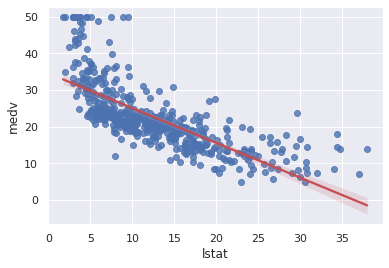

In [85]:
sns.regplot('lstat', 'medv', df, line_kws = {"color":"r"}, ci=95)

# With RSE We can calculate the confidence interval for the predictions and plot it

## wls_prediction_std

calculate standard deviation and confidence interval for prediction

Return
-------
predstd : array_like, 1d standard error of prediction 

interval_l, interval_u : array_like, lower und upper confidence bounds

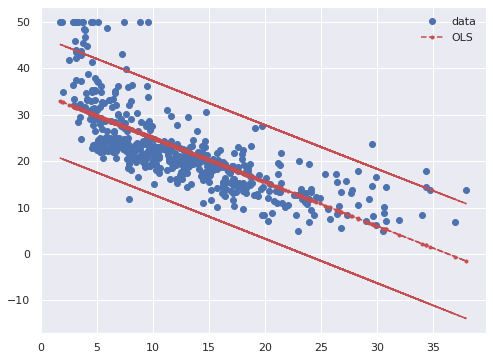

In [86]:
# we can p
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(result)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, y, 'o', label="data")
#ax.plot(X, y, 'b-', label="True")
ax.plot(X, result.fittedvalues, 'r--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');

In [139]:
result.resid

crim
0.00632    -5.822595
0.02731    -4.270390
0.02729     3.974858
0.03237     1.639304
0.06905     6.709922
             ...    
0.06263    -2.966864
0.04527    -5.327393
0.06076    -5.295563
0.10959    -6.397521
0.04741   -15.167452
Length: 506, dtype: float64

We can also plot the residuals against the fitted values (more later):

/home/giando/.julia/conda/3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


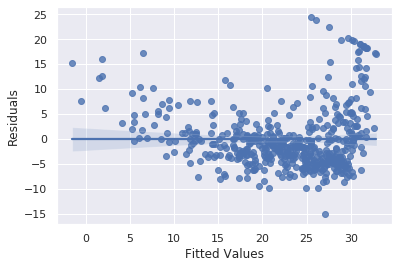

In [87]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=True)

Perhaps we want normalized residuals instead?


/home/giando/.julia/conda/3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


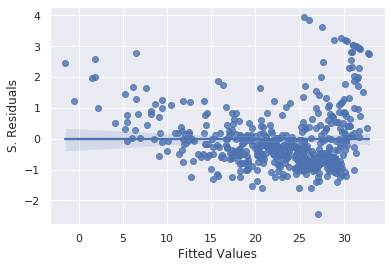

In [88]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=True)

We can also look for points with high leverage:
"...We just saw that outliers are observations for which the response $y_i$ is
unusual given the predictor $x_i$ . In contrast, observations with high leverage
have an unusual value for $x_i$"....We observe that removing the high leverage
observation has a much more substantial impact on the least squares line than removing the outlier. In fact, high leverage observations tend to have a sizable impact on the estimated regression line. It is cause for concern if the least squares line is heavily affected by just a couple of observations, because any problems with these points may invalidate the entire fit. For this reason, it is important to identify high leverage observations

/home/giando/.julia/conda/3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


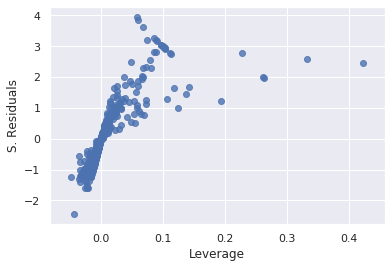

In [89]:
# class statsmodels.stats.outliers_influence.OLSInfluence
# class to calculate outlier and influence measures for OLS result

from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

## 3.2 Multiple Linear Regression

## What if we have more than 1 predictor?

In [90]:
advertising.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


let's try to fit models separately

In [91]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [92]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


- is this a good approach. Not entirly satisfacty. The regressions ignore the other media in forming the estimates

- we can try with a multilinear model $Y = \beta_0+\beta_1x_1+\beta_2x_2+..+\beta_px_p + ε$

### Table 3.4 & 3.6 - Statsmodels

In [93]:
# we can still use OLS

est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


TABLE 3.4. For the Advertising data, least squares coefficient estimates of the
multiple linear regression of number of units sold on radio, TV, and newspaper
advertising budgets.

- We can interpret the results in this way. Considering fixed 2 predictors (like TV and newspaper) we have an increase in the average sales due to radio. 
- we note that the value of newspaper here is close to zero while in the separated regression the values were not zero.
- also we note the p-value is not significant

- we got different results due to the fact that we care considering all the predictors together.Here we have an increase in sales due to newspaper WHILE considering fixed the other 2
